# Linear Regression - Advertising and Sales

## Load and Explore the Data

In [3]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


#### Confirm the Shape of the dataframe

In [5]:
data.shape

(200, 4)

#### There are 200 examples in the set - revealing contributions to advertising methods (Features), and the resulting sales (Target)

## Visualize the Data

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


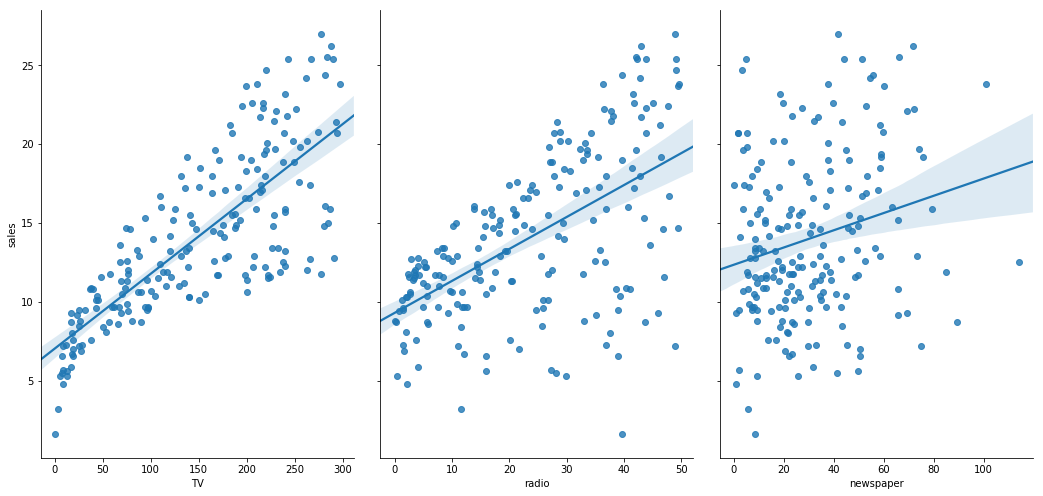

In [9]:
import seaborn as sns
%matplotlib inline

# Plot relationships between Features (TV, radio, newspaper) and Target (sales) 

sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], 
             y_vars='sales', size=7, aspect=0.7, kind='reg')

## Prepare X and Y

In [15]:
# Subset the Dataset - with a list of Feature Column names

feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]

print(X.head()),
print(),
print(X.shape),
print(),
print(type(X))

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

(200, 3)

<class 'pandas.core.frame.DataFrame'>


In [16]:
# Subset the Dataset - with a Target name

y = data['sales']

print(y.head()),
print(),
print(y.shape),
print(),
print(type(y))

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

(200,)

<class 'pandas.core.series.Series'>


#### Split X and y - into Training and Test sets

In [17]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Default is a 75% - 25% split
## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Model Coefficients

In [19]:
print(linreg.intercept_),
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


## Make Predictions

In [20]:
y_pred = linreg.predict(X_test)

## Compute Root Mean Squared Error for Sales Predictions
#### RMSE, MSE, and MAE for the model's sales predictions

In [24]:
import numpy as np
from sklearn import metrics

print('The RMSE: ', (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))),
print('The MSE: ', (metrics.mean_squared_error(y_test, y_pred))),
print('The MAE: ', (metrics.mean_absolute_error(y_test, y_pred)))

The RMSE:  1.4046514230328955
The MSE:  1.9730456202283384
The MAE:  1.0668917082595215


## Any Improvement When 'newspaper' is Removed from Model?
#### An example of simple Feature selection

In [26]:
# Will need to start again with a New Set of Features

new_feature_cols = ['TV', 'radio']

Xnew = data[new_feature_cols]

y = data['sales']

Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, random_state=1)

linreg.fit(Xnew_train, y_train)

y_pred = linreg.predict(Xnew_test)

print('The New RMSE: ', (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))),
print('The New MSE: ', (metrics.mean_squared_error(y_test, y_pred))),
print('The New MAE: ', (metrics.mean_absolute_error(y_test, y_pred)))

The New RMSE:  1.3879034699382888
The New MSE:  1.9262760418667424
The New MAE:  1.04775904112126


#### The Error Metrics have Decreased - Likely 'newspaper' is Not Helpful in Predicting 'sales'

In [27]:
#
# Exercise modeled after notes from - https://www.ritchieng.com/machine-learning-linear-regression/ 